In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


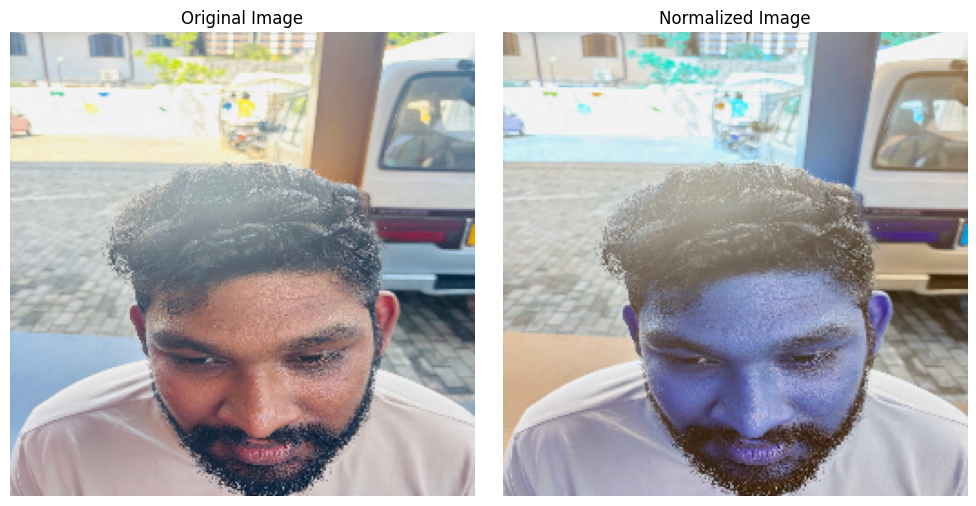

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path =r'/content/drive/MyDrive/Face/Chathuranga/WhatsApp Image 2024-10-25 at 17.41.17_1803c251.jpg'
# Load the image using cv2.imread()
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (256, 256))

# Normalize the image to the range [0, 1]
normalized_image = image_resized / 255.0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

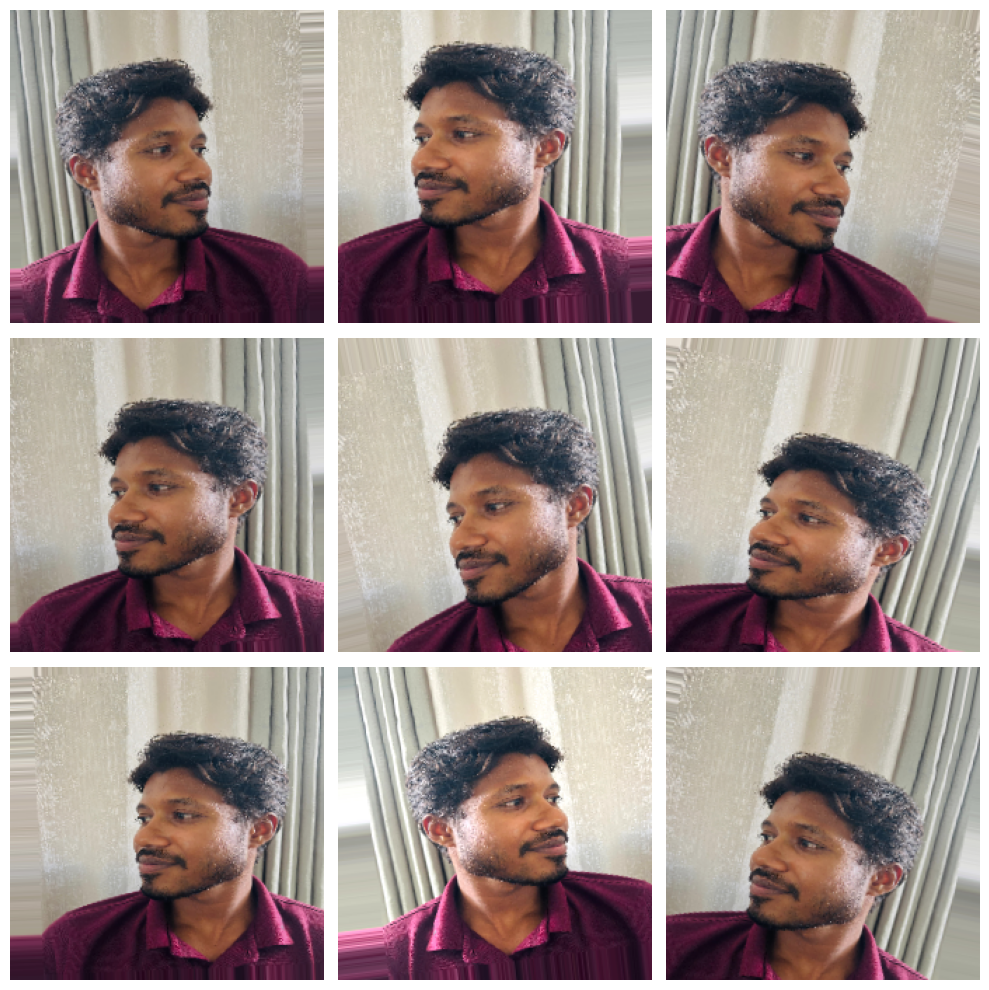

In [ ]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)


image_path =r"/content/drive/MyDrive/Face/Abdur/WhatsApp Image 2024-10-30 at 21.45.16_ef1d82b5.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)


augmented_images = datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_img = batch[0]
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = base_model.output

x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Face/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Face/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Found 1560 images belonging to 15 classes.
Found 390 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.4341 - loss: 2.4958 - val_accuracy: 0.3256 - val_loss: 2.8445 - learning_rate: 1.0000e-04
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9652 - loss: 0.7445 - val_accuracy: 0.4513 - val_loss: 2.5045 - learning_rate: 1.0000e-04
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9823 - loss: 0.6391 - val_accuracy: 0.5103 - val_loss: 2.1886 - learning_rate: 1.0000e-04
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9915 - loss: 0.5926 - val_accuracy: 0.6205 - val_loss: 1.9000 - learning_rate: 1.0000e-04
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9973 - loss: 0.5655 - val_accuracy: 0.6359 - val_loss: 1.6677 - learning_rate: 1.0000e-04
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9981 - loss: 0.5574 - val_accuracy: 0.7718 - val_loss: 1.3698 - learning_rate: 1.0000e-04
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9992 

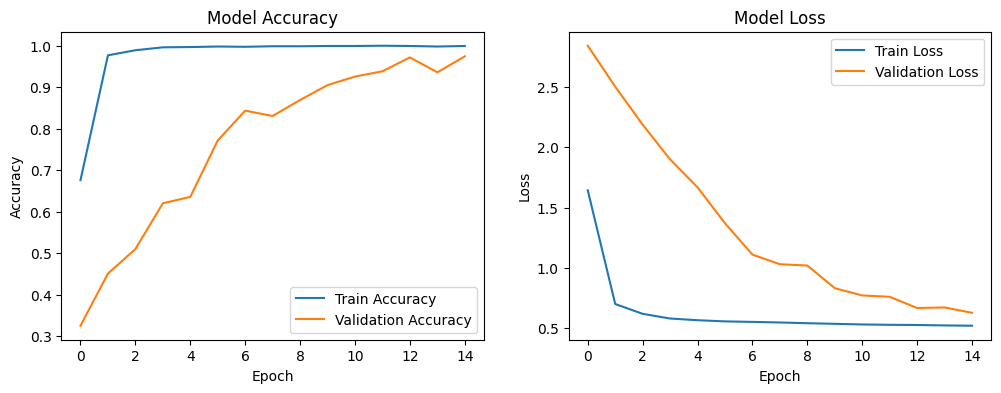

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

In [13]:
model.save('mobileNet_face_model_final.h5')


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 10,602,607 (40.45 MB)

 Trainable params: 3,341,711 (12.75 MB)

 Non-trainable params: 577,472 (2.20 MB)

 Optimizer params: 6,683,424 (25.50 MB)

In [18]:
from google.colab import files

files.download('/content/mobileNet_face_model_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9549 - loss: 0.6254
Validation Loss: 0.6339319944381714
Validation Accuracy: 0.9615384340286255


13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step
Confusion Matrix:
[[1 4 2 1 2 2 1 1 5 1 1 2 1 0 2]
 [3 0 2 3 2 3 3 2 0 2 2 2 0 2 0]
 [1 2 0 1 1 2 0 5 5 1 2 0 2 2 2]
 [4 1 2 0 1 2 2 3 1 2 3 3 0 1 1]
 [0 1 3 2 1 1 2 2 3 2 2 0 4 3 0]
 [1 0 3 1 0 1 4 4 1 1 2 2 2 2 2]
 [2 1 1 5 4 0 1 1 2 0 2 2 3 1 1]
 [1 0 3 1 4 0 2 2 1 3 3 0 1 4 1]
 [2 4 3 3 1 0 1 3 0 1 2 1 2 1 2]
 [1 3 2 2 0 2 2 0 2 3 2 1 5 0 1]
 [1 2 1 0 1 2 3 0 3 0 1 2 2 4 4]
 [2 3 0 2 2 1 1 2 2 3 0 2 3 1 2]
 [1 4 3 2 2 0 2 0 2 1 0 2 3 2 2]
 [2 1 2 1 1 2 1 0 1 2 3 3 2 0 5]
 [4 0 0 2 4 4 1 0 2 1 1 4 0 3 0]]


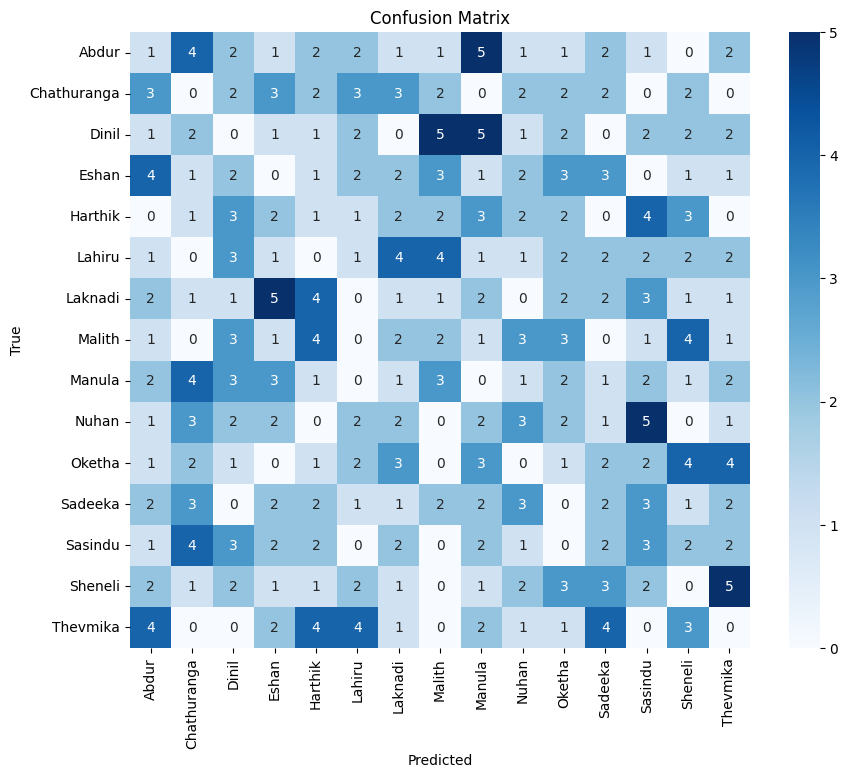

Classification Report:
              precision    recall  f1-score   support

       Abdur       0.04      0.04      0.04        26
 Chathuranga       0.00      0.00      0.00        26
       Dinil       0.00      0.00      0.00        26
       Eshan       0.00      0.00      0.00        26
     Harthik       0.04      0.04      0.04        26
      Lahiru       0.05      0.04      0.04        26
     Laknadi       0.04      0.04      0.04        26
      Malith       0.08      0.08      0.08        26
      Manula       0.00      0.00      0.00        26
       Nuhan       0.13      0.12      0.12        26
      Oketha       0.04      0.04      0.04        26
     Sadeeka       0.08      0.08      0.08        26
     Sasindu       0.10      0.12      0.11        26
     Sheneli       0.00      0.00      0.00        26
    Thevmika       0.00      0.00      0.00        26

    accuracy                           0.04       390
   macro avg       0.04      0.04      0.04       390
wei

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = validation_generator.classes


conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print(class_report)

# Average Accuracy
average_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Average Accuracy: {average_accuracy:.4f}")